In [225]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input,Activation #Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping #ReduceLROnPlateau
from sqlalchemy import create_engine,text

In [156]:
 # Excel dosyasından okuma
aselsanveriset=pd.read_excel("/Users/nilsuaksu/Downloads/ASELS.xlsx")

In [158]:
aselsanveriset

,Tarih,Saat,Açılış,Yüksek,Düşük,Kapanış,Ortalama,Hacim,Lot
0,04.01.2010,00:00:00,0.295,0.34,0.295,0.340,0.321287,13127120,40857940
1,05.01.2010,00:00:00,0.345,0.36,0.320,0.335,0.341676,24056360,70406920
2,06.01.2010,00:00:00,0.335,0.34,0.325,0.325,0.328337,5377585,16378260
3,07.01.2010,00:00:00,0.330,0.36,0.325,0.355,0.345457,23410590,67767020
4,08.01.2010,00:00:00,0.360,0.36,0.345,0.350,0.349563,11092410,31732200
...,...,...,...,...,...,...,...,...,...
3625,05.07.2024,00:00:00,60.200,61.60,59.850,60.650,60.804060,1695006000,27876530
3626,08.07.2024,00:00:00,61.100,64.00,60.500,63.300,62.646670,4018084000,64138830
3627,09.07.2024,00:00:00,63.200,65.00,63.050,64.550,64.180570,3875649000,60386640
3628,10.07.2024,00:00:00,64.650,65.45,64.100,65.000,64.861690,4137530000,63790040


In [239]:
aselsanveriset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tarih         3630 non-null   int64  
 1   Açılış        3630 non-null   float64
 2   Yüksek        3630 non-null   float64
 3   Düşük         3630 non-null   float64
 4   Kapanış       3630 non-null   float64
 5   Ortalama      3630 non-null   float64
 6   Hacim         3630 non-null   int64  
 7   Lot           3630 non-null   int64  
 8   Kapanış_Fark  3630 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 255.4 KB


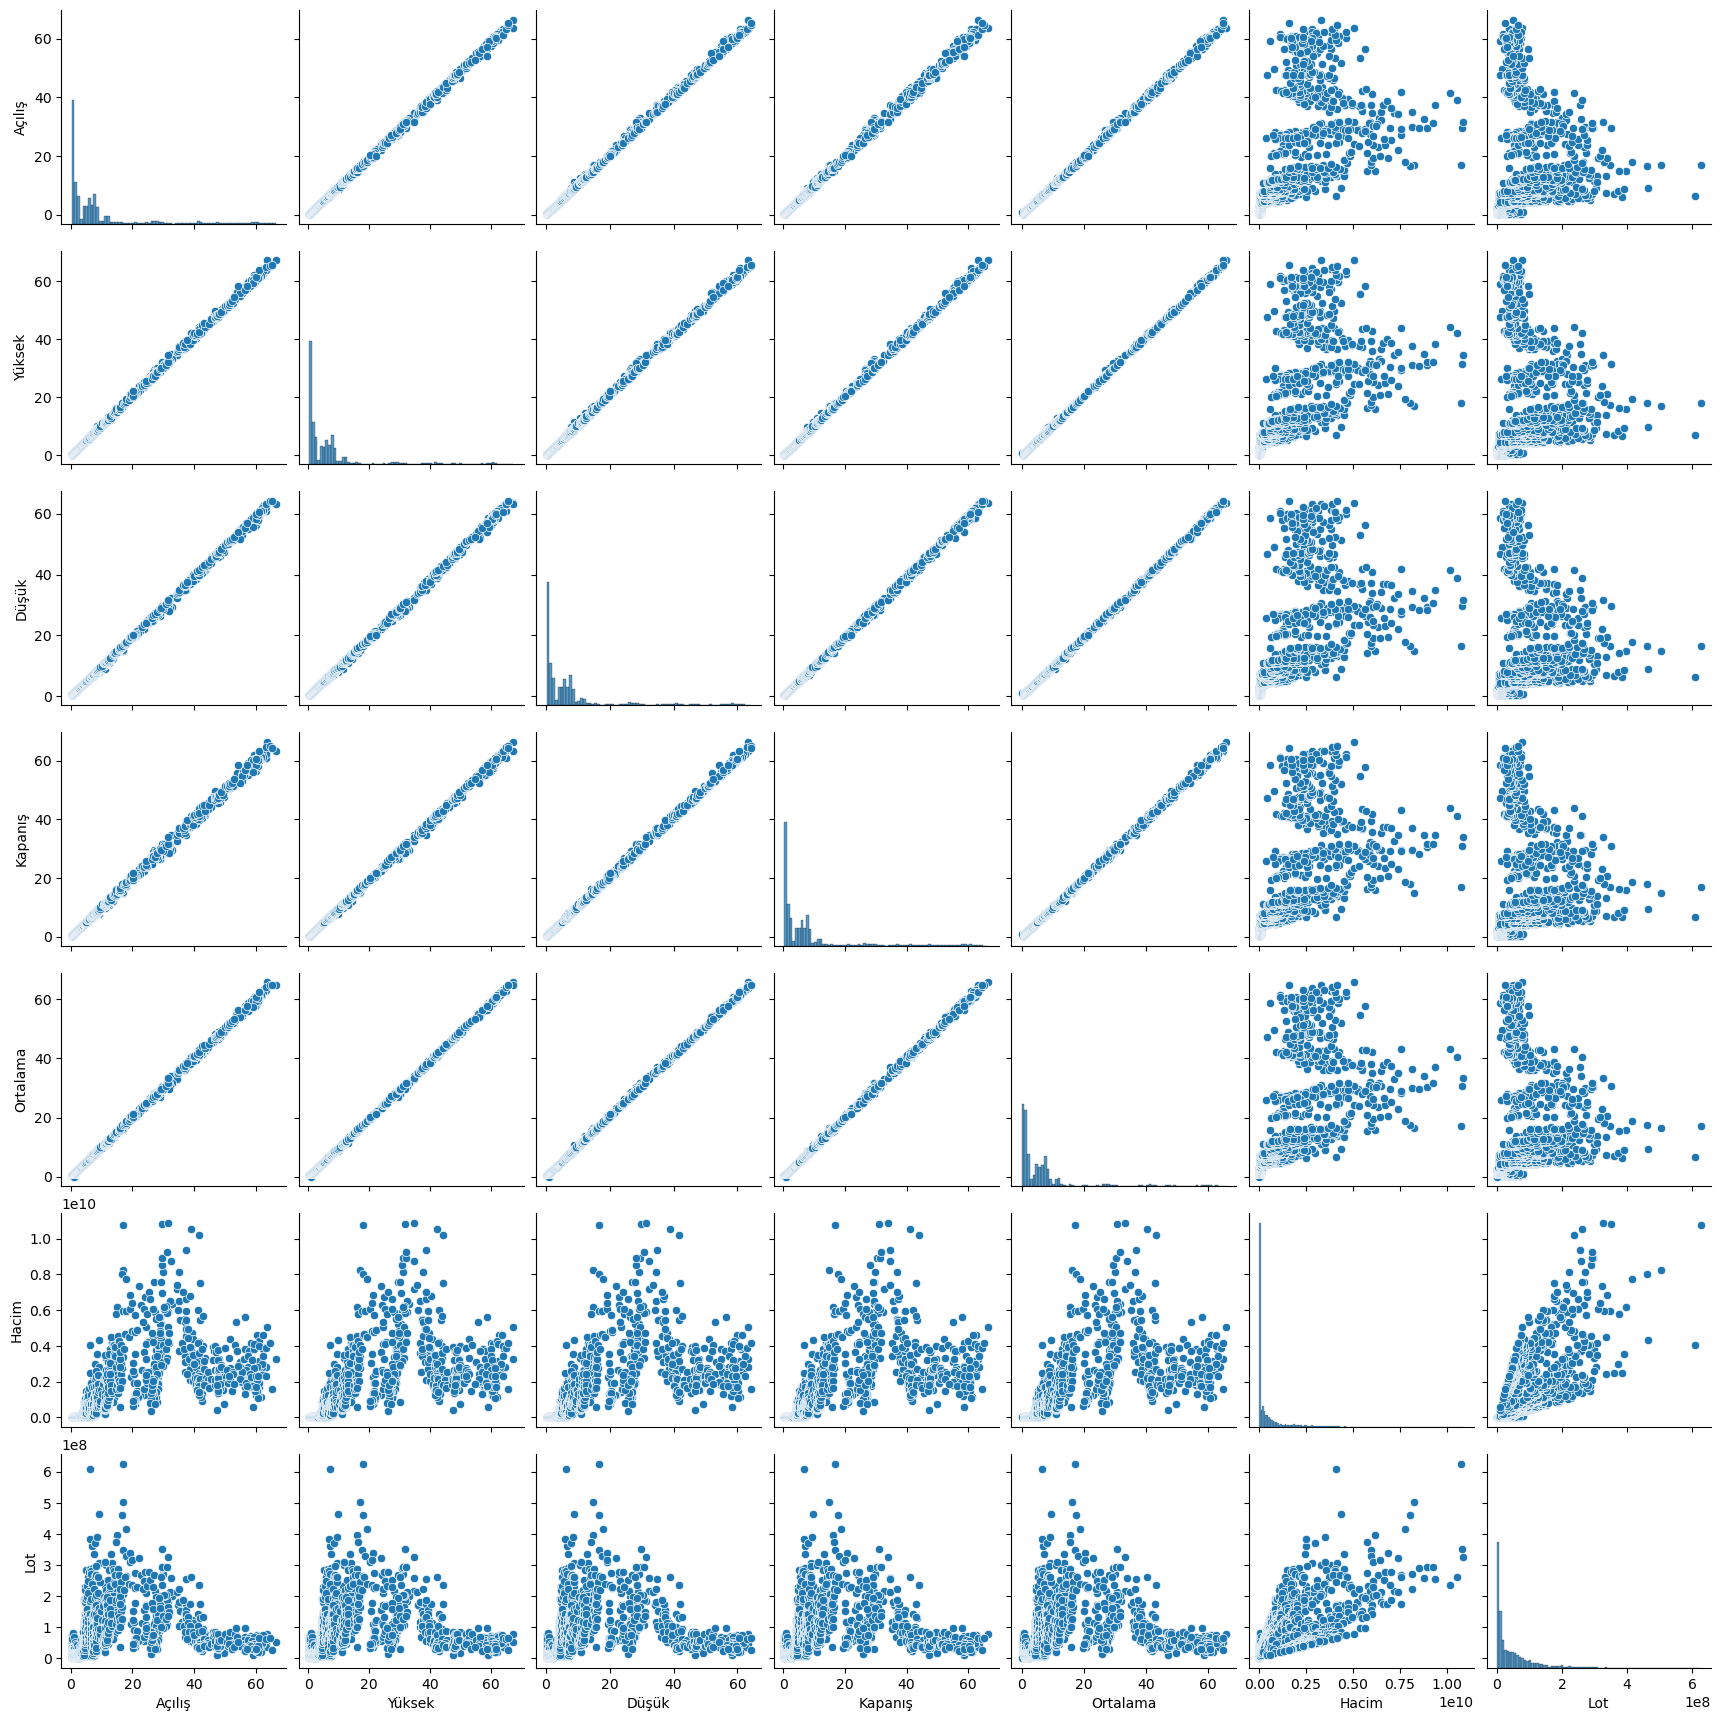

In [162]:
sbn.pairplot(aselsanveriset)

In [163]:
# 'Tarih' sütununu datetime formatına çevirme ve ordinal değerlere dönüştürme
aselsanveriset['Tarih'] = pd.to_datetime(aselsanveriset['Tarih'], format='%d.%m.%Y')
aselsanveriset['Tarih'] = aselsanveriset['Tarih'].map(pd.Timestamp.toordinal)
#sisecamveriset =sisecamveriset.set_index('Tarih')
aselsanveriset = aselsanveriset.select_dtypes(include=['float64', 'int64'])

In [164]:
aselsanveriset

,Tarih,Açılış,Yüksek,Düşük,Kapanış,Ortalama,Hacim,Lot
0,733776,0.295,0.34,0.295,0.340,0.321287,13127120,40857940
1,733777,0.345,0.36,0.320,0.335,0.341676,24056360,70406920
2,733778,0.335,0.34,0.325,0.325,0.328337,5377585,16378260
3,733779,0.330,0.36,0.325,0.355,0.345457,23410590,67767020
4,733780,0.360,0.36,0.345,0.350,0.349563,11092410,31732200
...,...,...,...,...,...,...,...,...
3625,739072,60.200,61.60,59.850,60.650,60.804060,1695006000,27876530
3626,739075,61.100,64.00,60.500,63.300,62.646670,4018084000,64138830
3627,739076,63.200,65.00,63.050,64.550,64.180570,3875649000,60386640
3628,739077,64.650,65.45,64.100,65.000,64.861690,4137530000,63790040


In [165]:
aselsanveriset.describe()

,Tarih,Açılış,Yüksek,Düşük,Kapanış,Ortalama,Hacim,Lot
count,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3630.000000,3.630000e+03,3.630000e+03
mean,736415.714050,8.085175,8.238570,7.944340,8.077134,8.098875,6.415719e+08,4.634788e+07
std,1531.596596,12.794191,13.052008,12.561602,12.782324,12.819573,1.283020e+09,6.256668e+07
min,733776.000000,0.285000,0.290000,0.260000,0.280000,0.000000,0.000000e+00,0.000000e+00
25%,735085.250000,1.040000,1.055000,1.025000,1.040000,1.041406,5.547324e+06,5.792100e+06
50%,736404.500000,4.067500,4.132500,4.022500,4.065000,4.093709,5.913472e+07,1.953786e+07
75%,737745.750000,7.888750,7.985000,7.785000,7.870000,7.882063,6.192944e+08,6.382958e+07
max,739078.000000,66.500000,67.300000,64.200000,66.500000,65.769370,1.088127e+10,6.262526e+08


In [166]:
aselsanveriset.isnull().sum()

Tarih       0
Açılış      0
Yüksek      0
Düşük       0
Kapanış     0
Ortalama    0
Hacim       0
Lot         0
dtype: int64

In [167]:
aselsanveriset = aselsanveriset.dropna()

<Axes: xlabel='Kapanış', ylabel='Count'>

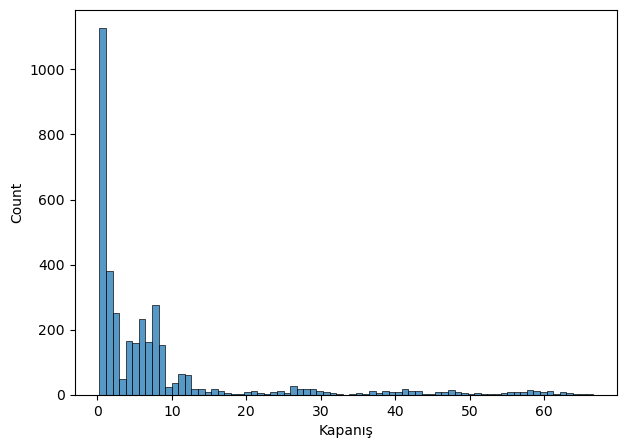

In [168]:
plt.figure(figsize=(7,5))
sbn.histplot(aselsanveriset["Kapanış"])

In [169]:
numeric_df = aselsanveriset#.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesaplamak
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini yazdırmak
print(correlation_matrix)

             Tarih    Açılış    Yüksek     Düşük   Kapanış  Ortalama  \
Tarih     1.000000  0.711819  0.711979  0.711692  0.711790  0.711930   
Açılış    0.711819  1.000000  0.999811  0.999799  0.999509  0.999842   
Yüksek    0.711979  0.999811  1.000000  0.999755  0.999779  0.999942   
Düşük     0.711692  0.999799  0.999755  1.000000  0.999789  0.999915   
Kapanış   0.711790  0.999509  0.999779  0.999789  1.000000  0.999850   
Ortalama  0.711930  0.999842  0.999942  0.999915  0.999850  1.000000   
Hacim     0.616402  0.705153  0.712118  0.703392  0.709008  0.708600   
Lot       0.575258  0.329159  0.335112  0.327299  0.332309  0.331987   

             Hacim       Lot  
Tarih     0.616402  0.575258  
Açılış    0.705153  0.329159  
Yüksek    0.712118  0.335112  
Düşük     0.703392  0.327299  
Kapanış   0.709008  0.332309  
Ortalama  0.708600  0.331987  
Hacim     1.000000  0.751333  
Lot       0.751333  1.000000  


In [178]:
aselsanveriset['Kapanış_Fark'] = aselsanveriset['Kapanış'].diff().fillna(0)

<Axes: >

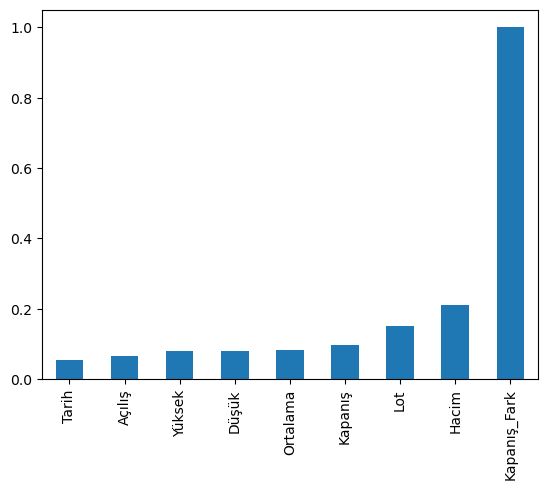

In [180]:
numeric_df.corr()["Kapanış_Fark"].sort_values().plot(kind="bar")

In [182]:
numeric_df.corr()["Kapanış_Fark"].sort_values()

Tarih           0.055144
Açılış          0.067099
Yüksek          0.080875
Düşük           0.080968
Ortalama        0.081863
Kapanış         0.096294
Lot             0.151848
Hacim           0.212343
Kapanış_Fark    1.000000
Name: Kapanış_Fark, dtype: float64

In [184]:
# Özellikler ve hedef değişken
bagimsizdegiskenler = ['Tarih', 'Açılış' ,'Yüksek', 'Düşük', 'Ortalama', 'Hacim', 'Lot','Kapanış_Fark']# bu modelin ogrenmesi icin kullanılacak bagimsiz degiskenler
hedef = 'Kapanış'# hedef degiskeni, bu modelin tahmin etmeye calisacagi deger

x = aselsanveriset[bagimsizdegiskenler].values
y = aselsanveriset[hedef].values

# Eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [186]:
# degiskenlerin ve test lerin sayısını kontrol etme, verilerin %33 ü testlere gitti
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2432, 8)
x_test shape: (1198, 8)
y_train shape: (2432,)
y_test shape: (1198,)


In [188]:
# MinMaxScaler kullanarak verileri 0-1 arasında ölçeklendirme
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [190]:
x_train

array([[2.91265799e-01, 1.02695764e-02, 1.03715863e-02, ...,
        9.00758281e-04, 1.63475365e-02, 4.15923567e-01],
       [9.65855499e-01, 7.16982557e-01, 7.09595583e-01, ...,
        1.33032866e-01, 4.97203969e-02, 3.37579618e-01],
       [7.02886248e-01, 7.39258476e-02, 7.80480525e-02, ...,
        7.20183026e-02, 2.38469072e-01, 4.07006369e-01],
       ...,
       [1.43369176e-01, 3.09597523e-03, 2.98462916e-03, ...,
        6.34509364e-05, 2.74833927e-03, 4.13375796e-01],
       [8.79645350e-01, 2.42618742e-01, 2.39665722e-01, ...,
        2.24472135e-01, 2.47724177e-01, 3.80891720e-01],
       [3.52763630e-01, 1.64615268e-02, 1.63408447e-02, ...,
        6.04756660e-04, 7.52756282e-03, 4.10828025e-01]])

In [192]:
# Verilerin korelasyonunu kontrol etme
aselsanveriset_corr = aselsanveriset[bagimsizdegiskenler + [hedef]].corr()
print("Korelasyon Matris:")
print(aselsanveriset_corr)

Korelasyon Matris:
                 Tarih    Açılış    Yüksek     Düşük  Ortalama     Hacim  \
Tarih         1.000000  0.711819  0.711979  0.711692  0.711930  0.616402   
Açılış        0.711819  1.000000  0.999811  0.999799  0.999842  0.705153   
Yüksek        0.711979  0.999811  1.000000  0.999755  0.999942  0.712118   
Düşük         0.711692  0.999799  0.999755  1.000000  0.999915  0.703392   
Ortalama      0.711930  0.999842  0.999942  0.999915  1.000000  0.708600   
Hacim         0.616402  0.705153  0.712118  0.703392  0.708600  1.000000   
Lot           0.575258  0.329159  0.335112  0.327299  0.331987  0.751333   
Kapanış_Fark  0.055144  0.067099  0.080875  0.080968  0.081863  0.212343   
Kapanış       0.711790  0.999509  0.999779  0.999789  0.999850  0.709008   

                   Lot  Kapanış_Fark   Kapanış  
Tarih         0.575258      0.055144  0.711790  
Açılış        0.329159      0.067099  0.999509  
Yüksek        0.335112      0.080875  0.999779  
Düşük         0.327299  

In [194]:
# TensorFlow ile bir model oluşturma


model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(8, activation='relu'),
    #Dropout(0.3),
    Dense(4, activation='relu'),
    #Dropout(0.2),
    Dense(4, activation='relu'),
    #Dropout(0.3),
    #Dense(7, activation='relu'),
    Dense(1)
])


In [196]:
model.compile(optimizer='adam', loss='mse')
#model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss',mode="min",verbose=1, patience=25)

In [198]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,validation_split=0.2,verbose=1,callbacks=[ early_stopping])

Epoch 1/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 218.8918 - val_loss: 220.5881
Epoch 2/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - loss: 211.1704 - val_loss: 189.3334
Epoch 3/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 161.6050 - val_loss: 134.7142
Epoch 4/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 507us/step - loss: 108.8217 - val_loss: 89.9263
Epoch 5/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 79.7414 - val_loss: 59.2681
Epoch 6/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 517us/step - loss: 53.0691 - val_loss: 30.2575
Epoch 7/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 521us/step - loss: 25.4108 - val_loss: 10.4423
Epoch 8/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 525us/step - loss: 7.4645 - val_loss: 3.9827
Epoch 9/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 594us/step - loss: 3.3671 - val_loss: 2.2552
Epoch 10/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 512us/step - loss: 1.9896 - val_loss: 1.5797
Epoch 11/200
76/76 ━━━━━━━━━━━━━━━━━━━━ 0s 516us/step - loss: 1.4707 - val_loss: 1.1992
Epoch 12/200
76/76 ━━━

In [200]:
kayipVerisi=pd.DataFrame(history.history)

In [202]:
kayipVerisi.head()

,loss,val_loss
0,224.965942,220.588120
1,208.456589,189.333420
2,162.766830,134.714218
3,108.373100,89.926292
4,74.633530,59.268063


<Axes: >

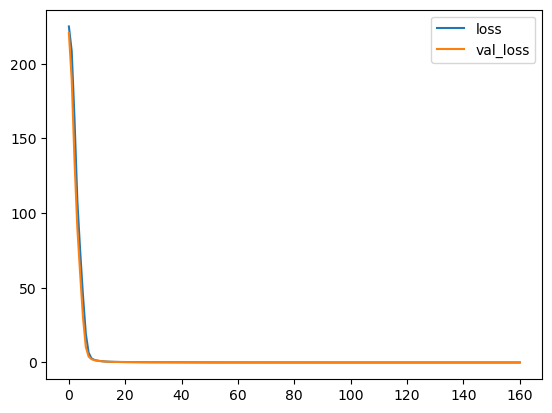

In [204]:
kayipVerisi.plot()

In [206]:
tahminDizisi = model.predict(x_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 681us/step


In [208]:
mean_absolute_error(y_test,tahminDizisi)

0.09409099865039322

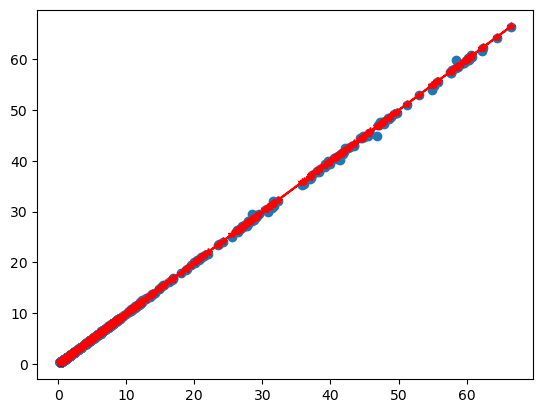

In [210]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"r-*")

In [212]:
# Model performansını değerlendirme (Mean Squared Error)
mse = mean_squared_error(y_test, tahminDizisi)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.022955746901775462


In [214]:
# Tahmin sonuçlarını ve gerçek değerleri karşılaştırma
results = pd.DataFrame({'Gerçek': y_test, 'Tahmin': tahminDizisi.flatten()})
print(results)#.head())

      Gerçek     Tahmin
0      0.320   0.276158
1      1.160   1.103927
2      8.505   8.451263
3     13.555  13.413578
4      0.395   0.376205
...      ...        ...
1193   1.005   0.986008
1194   7.535   7.469512
1195   1.275   1.220727
1196  11.305  11.206274
1197   0.795   0.738869

[1198 rows x 2 columns]


In [216]:
# MySQL veritabanı bağlantı dizesi
username = 'root'
password = 'Fidelio06'
host = '192.168.1.88'
database = 'seda_nilsu_veri_analizi'

In [218]:
# MySQL engine oluşturma
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database}')

In [227]:
try:
    # Veritabanına bağlanın ve DataFrame'i SQL tablosuna yazın
    with engine.connect() as connection:
        # DataFrame'i SQL tablosuna yazma
        aselsanveriset.to_sql('aselsananaliz', con=connection, if_exists='replace', index=False)
        print("Veriler başarıyla tabloya aktarıldı.")

        # Verilerin başarıyla aktarıldığını doğrulama
        verification_query = text("SELECT COUNT(*) FROM aselsananaliz;")
        result = connection.execute(verification_query)
        count = result.scalar()

        if count > 0:
            print(f"Tablo 'aselsananaliz' içinde {count} veri var.")
        else:
            print("Tablo 'aselsananaliz' içinde veri bulunamadı.")
        
except Exception as e:
    print(f"Bir hata oluştu: {e}")

Veriler başarıyla tabloya aktarıldı.
Tablo 'aselsananaliz' içinde 3630 veri var.


In [229]:
with engine.connect() as connection:
   kayipVerisi.to_sql('aselsankayıpverisi', con=connection, if_exists='replace', index=False)
   print("Veriler başarıyla tabloya aktarıldı.")

Veriler başarıyla tabloya aktarıldı.


In [233]:
with engine.connect() as connection:
   results.to_sql('aselsansonuçlar', con=connection, if_exists='replace', index=False)
   print("Veriler başarıyla tabloya aktarıldı.")

Veriler başarıyla tabloya aktarıldı.
